#### Random Sample Imputation 

Aim:it consist of taking random obeservation from the  data set and  we  use  this  obeservation to replace the  nan values 




When should be used: (MCAR)

In [2]:
import pandas as pd 
import os
os.chdir("D:\data")
df= pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])

In [3]:
df.head()


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df["Age"].isnull().sum()

177

In [6]:
df["Age"].dropna().sample(df["Age"].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [7]:
df[df["Age"].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [8]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [9]:
median=df["Age"].median()
median

28.0

In [10]:
impute_nan(df,"Age",median)

In [11]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [12]:
import matplotlib.pyplot as plt 
%matplotlib inline


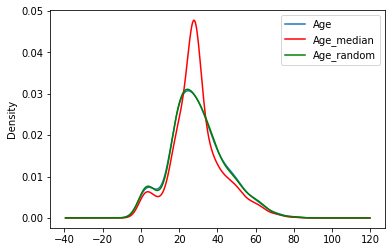

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df["Age_median"].plot(kind="kde", ax=ax, color="red")
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Capturing NAN values with a new feature

It works well if the data are not missing completely at random (MNAR), missing not completely at random

In [14]:
df= pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [16]:
import numpy as np 
df["Age_NAN"]=np.where(df["Age"].isnull(),1,0)


In [17]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [18]:
df["Age"].median()

28.0

In [21]:
df["Age"].fillna(df["Age"].median(),inplace=True)

In [22]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### End of distribution imputation 

MNAR


In [23]:
df= pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


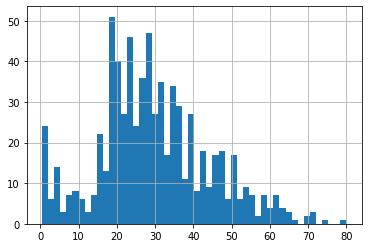

In [24]:
df["Age"].hist(bins=50)

In [29]:
## we have to replace the nan values from the end of distribution that is 3 SD
extream_values=df["Age"].mean()+3*df["Age"].std()

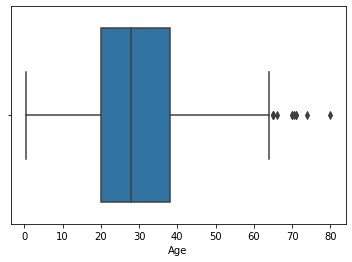

In [28]:
import seaborn as sns 
sns.boxplot(df["Age"])

In [31]:
def impute_nan(df,variable,median,extream_values):
    df[variable+"_end_of_distribution"]=df[variable].fillna(extream_values)
    df[variable].fillna(median,inplace=True)

In [33]:
median=df["Age"].median()

In [35]:
impute_nan(df,"Age",median,extream_values)

In [36]:
df.head()

,Survived,Age,Fare,Age_end_of_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


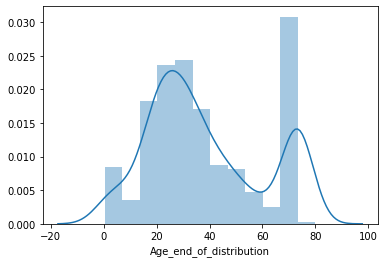

In [37]:
sns.distplot(df["Age_end_of_distribution"])

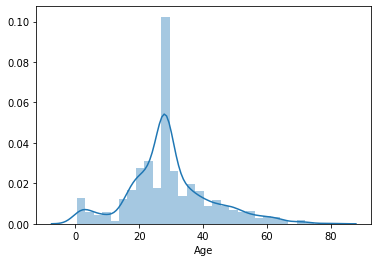

In [38]:
sns.distplot(df["Age"])

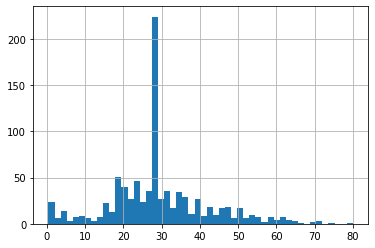

In [39]:
df["Age"].hist(bins=50)

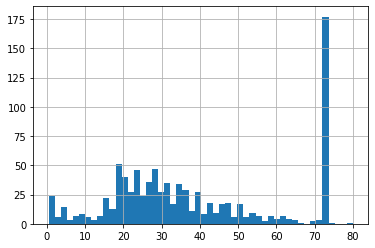

In [40]:
df["Age_end_of_distribution"].hist(bins=50)

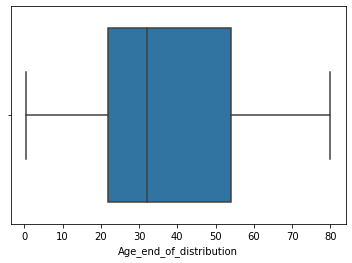

In [41]:
sns.boxplot(df["Age_end_of_distribution"])